In [1]:
# loading libraries
library(tidymodels)
library(tidyverse)
library(tidyclust)
library(forcats)
library(repr)
library(GGally)
# specify the width and height of the graph
options(repr.matrix.max.rows=6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::

## Behavioral Predictions of Newsletter Subscription Across Different  Players Types

A group of researchers is interested in collecting data on how individuals engage with video games. To support their investigation, they have a MineCraft server to record players' action as they navigate through the world. However, serveral important considerations has to be addressed to ensure the successful execution of the research. This project aims to explore the following question: How does a individual's experience and gender influence the likelyhood of subscribing to a newsletter in `players.csv`?

To begin with, we start by investigating the data set `players.csv` that will be used to explore the question. The data set is collected from a online MineCraft server created by a research group in UBC. 

In [2]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The data set above has 7 variables, which are: `experience`, `subscribe`,`hashedEmail`,`played_hours`,`name`,`gender`, and `age`. There are 196 observations, thus 196 individuals participated to the collection of the data. The meaning of each variable is presented below.
* `experience`: the player's experience level in MineCraft
* `subscribe` : the player subscribed to a newsletter or service
* `hashedEmail`: a hashed version of the player's email address
* `played_hours` :total number of hours the player has spent playing on MineCraft server
* `name` : the player's name
* `gender` : the player's self-reported gender
* `age` : the player's self-reported or estimated age

There are some problems in this data set, such as the variable `play_hours` has an underscore, the `Age` is double and capitalized.

## Data Processing and Analysis
We will start the analysis by selecting the variables for the question, which is `experience`, `subscribe`, and `gender`. From the data set above, `experience` is expressed as a charater, thus for future analysis we will change it to a factor, allowing us to plot experience as a group.

In [3]:
players <- players_data|>
    select(experience, subscribe, gender)|>
    mutate(experience=as_factor(experience))|>
    mutate(gender=as_factor(gender))

players

experience,subscribe,gender
<fct>,<lgl>,<fct>
Pro,TRUE,Male
Veteran,TRUE,Male
Veteran,FALSE,Male
⋮,⋮,⋮
Amateur,FALSE,Prefer not to say
Amateur,FALSE,Male
Pro,TRUE,Other


It is challenging to identify the relationships directly from a data table, thereforea bar plot would be useful to visually examine the association between the variables that we are interested in.

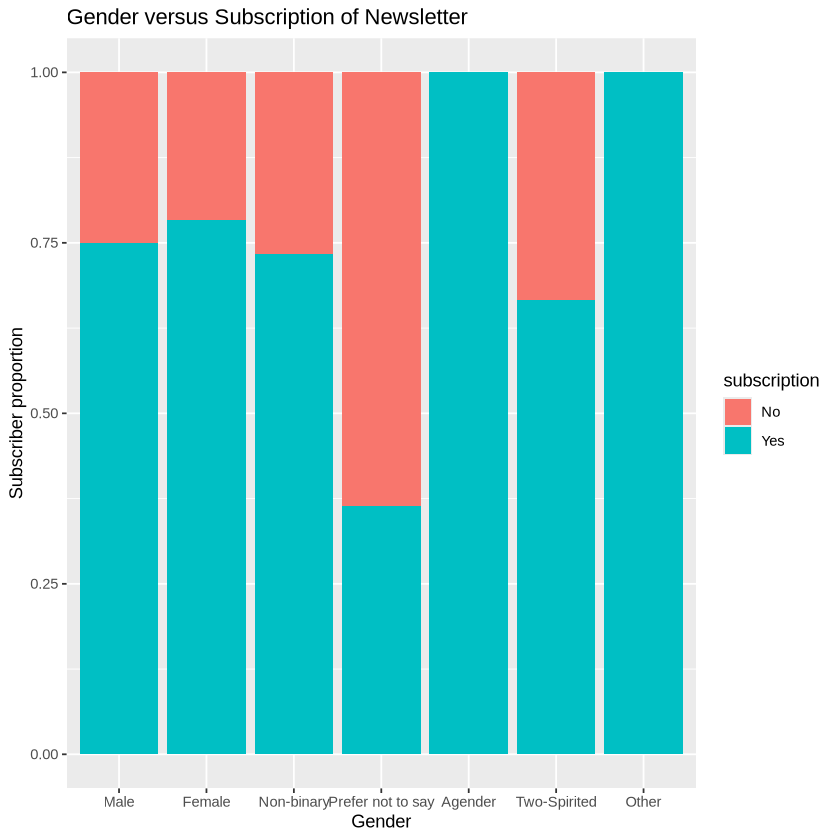

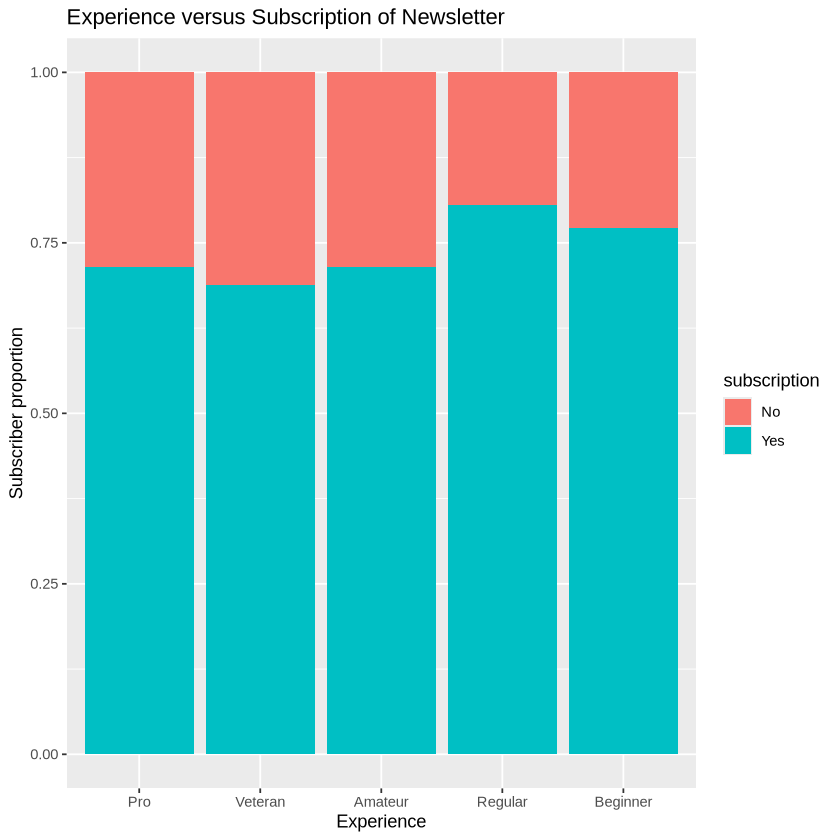

In [4]:
gender_bar <- players|>
    ggplot(aes(x= gender, fill=subscribe))+
    geom_bar(position="fill")+
    labs(x="Gender", y= "Subscriber proportion", fill="subscription")+
    ggtitle("Gender versus Subscription of Newsletter")+
    scale_fill_discrete(labels=c("No", "Yes"))

experience_bar <- players|>
    ggplot(aes(x= experience, fill=subscribe))+
    geom_bar(position="fill")+
    labs(x="Experience", y= "Subscriber proportion", fill="subscription")+
    ggtitle("Experience versus Subscription of Newsletter")+
    scale_fill_discrete(labels=c("No", "Yes"))

gender_bar
experience_bar

The two plots present different patterns in subscription. The first plot shows that individuals who identify themselves as `agender` and `other` exhibit 100% subscribtion. In constrast, those who identify themselves as `female`, `male`, `non-binary`, `two-spirited` have approximately 75% subscription. However, individuals who selected `prefer not to say` showed a significantly low likelyhood of subscribing. 

The second plot examines the relationship between experience level and subscription and suggested that experience has minimal correlation with  subscription. All levels of experience including `beginner`, `amateur`, `regular`, `veteran`, and `pro` showed the similar subscription rate of 75%. This indicates that the level of experience does not appear to be a strong predictor of their likelyhood to subscribe to the newsletter.

Now, we will analyse the data using K-NN classification, as our objective is to preidct whether a player subscribes based on their experience and gender, which makes this a binary classification problem. Although there are some issues we need to address before peforming the analysis. Since K-NN classification relies on distance-based calculations, categorical variables such as `experience` and `gender` has to converted into numeric variables.

In [5]:
players <- players|>
    mutate(experience_num=as.numeric(factor(experience)))|>
    mutate(gender_num=as.numeric(factor(gender)))|>
    mutate(subscribe=as_factor(subscribe))
players

experience,subscribe,gender,experience_num,gender_num
<fct>,<fct>,<fct>,<dbl>,<dbl>
Pro,TRUE,Male,1,1
Veteran,TRUE,Male,2,1
Veteran,FALSE,Male,2,1
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,Prefer not to say,3,4
Amateur,FALSE,Male,3,1
Pro,TRUE,Other,1,7


To keep the data frame simple, we will select the columns needed.

In [6]:
players_knn <- players|>
    select(experience_num, gender_num, subscribe)
players_knn

experience_num,gender_num,subscribe
<dbl>,<dbl>,<fct>
1,1,TRUE
2,1,TRUE
2,1,FALSE
⋮,⋮,⋮
3,4,FALSE
3,1,FALSE
1,7,TRUE


After creating the data frame, we will split the data frame into 70-30 for training and testing sets. 

In [7]:
set.seed(2000)
players_split <- initial_split(players, prop=0.7)
players_train <- training(players_split)
players_test <- testing(players_split)

In the followin steps, we will create a recipe, specification, 5-fold cross-validation, and a accuracy plot to determine the best k neighbors.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6374237,5,0.04871764,Preprocessor1_Model1
2,accuracy,binary,0.6437525,5,0.03333664,Preprocessor1_Model2
3,accuracy,binary,0.6572243,5,0.05062627,Preprocessor1_Model3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,accuracy,binary,0.7445869,5,0.02238272,Preprocessor1_Model7
8,accuracy,binary,0.7368946,5,0.02157252,Preprocessor1_Model8
9,accuracy,binary,0.7594017,5,0.02043591,Preprocessor1_Model9


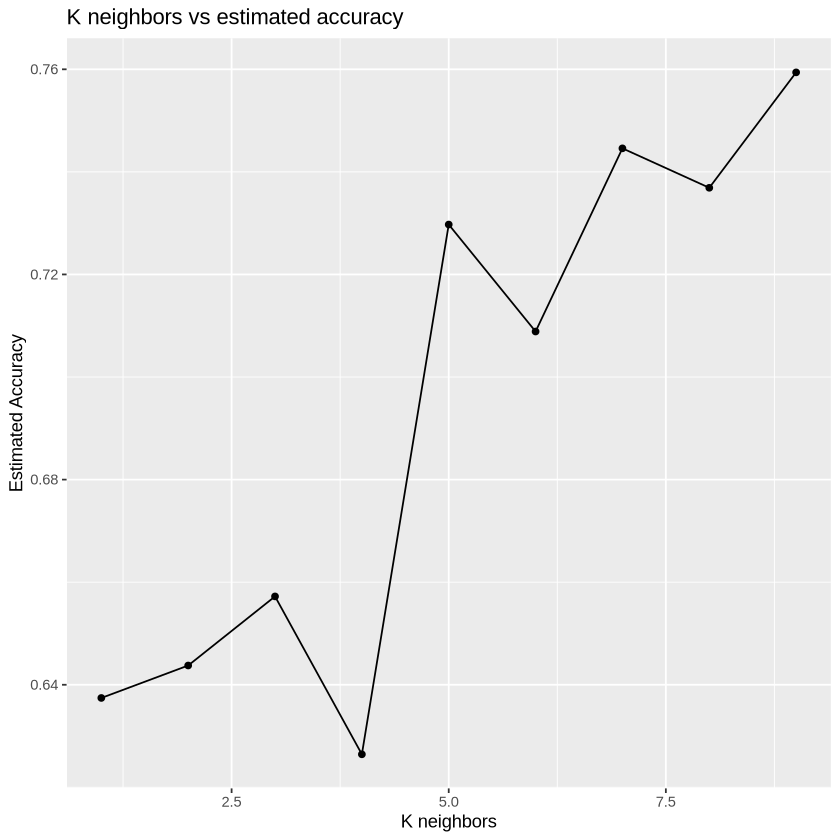

In [14]:
players_recipe <- recipe(subscribe~ gender_num+experience_num, data=players_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors= tune())|>
    set_engine("kknn")|>
    set_mode("classification")

train_vfold <- vfold_cv(players_train, v=5, strata= subscribe)

k_vals <- tibble(neighbors=seq(from=1, to=9))

knn_results <- workflow()|>
    add_recipe(players_recipe)|>
    add_model(knn_spec)|>
    tune_grid(resamples=train_vfold,grid=k_vals)|>
    collect_metrics()|>
    filter(.metric=="accuracy")

accuracy_plot <- ggplot(knn_results, aes(x=neighbors, y= mean))+
    geom_point()+
    geom_line()+
    labs(x="K neighbors", y="Estimated Accuracy")+
    ggtitle("K neighbors vs estimated accuracy")
   

knn_results
accuracy_plot

By looking at the plot, 9 neighbors seems to have the greatest estimated accuracy. Therefore, we will be using k=9 to make a new model specification. Then, evaluate the accuracy of the classifier on the test set using `predict` function.

In [15]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=9)|>
    set_engine("kknn")|>
    set_mode("classification")

players_fit <- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(data=players_train)

players_test_preds <- predict(players_fit, players_test)|>
    bind_cols(players_test)|>
    metrics(truth=subscribe, estimate= .pred_class)


accuracy<- players_test_preds|>
    filter(.metric == "accuracy")|> 
    select(.estimate)
   

players_test_preds
accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.67796610
kap,binary,-0.03317972


.estimate
<dbl>
0.6779661


This classifier has a 67.8% chance of predicting whether the players will subscribe. This number below what was expected from the accuracy plot, possibly due to the random variation in the test set or the model is overfitting.

## Discussion

In this project, we determined the impact of gender and experience on the subscription of newsletter in `players.csv`. First, we started with visualizing the correlation between gender, experience, and subscription, and observed that gender has a impact on subscription but experience does not. Then, we created a k-nn classification model to predict the subscription based on gender and experience. As a result, the classifier has a 67.8% of accuracy, which is below what it was expected to be. The reason that caused this can be the k-nearest neighbors is too big so that it overfitted or the random variation in the test set. In the future, this type of questions can be used to determine what type of advertisement that a player will click in, in order to select the best game to put the advertisement.